<a href="https://colab.research.google.com/github/yandihlg/rrnn/blob/main/p3dec_cent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
3import tensorflow as tf
from keras import layers, models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [39]:
# @title Texto de título predeterminado
#data = pd.read_csv("/content/2023_2024.csv", header=None, names=['fecha', 'evento', 'centenas', 'decenas', 'unidades'])
data = pd.read_csv("/content/2023_2024.csv", header=None, names=['fecha', 'evento', 'decenas', 'unidades'])

In [40]:
data['fecha'] = pd.to_datetime(data['fecha']).map(pd.Timestamp.toordinal)

In [41]:
le = LabelEncoder()
data['evento'] = le.fit_transform(data['evento'])

In [42]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data[['fecha', 'evento']])

In [43]:
y = data['decenas']*10 + data['unidades']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Una sola unidad de salida porque estamos haciendo predicción numérica
])

In [46]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [57]:
historial =model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
239/239 [==============================] - 1s 3ms/step - loss: 874.0949
Epoch 2/100
239/239 [==============================] - 1s 3ms/step - loss: 873.8589
Epoch 3/100
239/239 [==============================] - 1s 3ms/step - loss: 874.7856
Epoch 4/100
239/239 [==============================] - 0s 2ms/step - loss: 870.4380
Epoch 5/100
239/239 [==============================] - 0s 2ms/step - loss: 864.8795
Epoch 6/100
239/239 [==============================] - 0s 2ms/step - loss: 871.8024
Epoch 7/100
239/239 [==============================] - 0s 2ms/step - loss: 875.9255
Epoch 8/100
239/239 [==============================] - 0s 2ms/step - loss: 874.6495
Epoch 9/100
239/239 [==============================] - 0s 2ms/step - loss: 871.6382
Epoch 10/100
239/239 [==============================] - 0s 2ms/step - loss: 872.6525
Epoch 11/100
239/239 [==============================] - 0s 2ms/step - loss: 876.3094
Epoch 12/100
239/239 [==============================] - 0s 2ms/step - loss

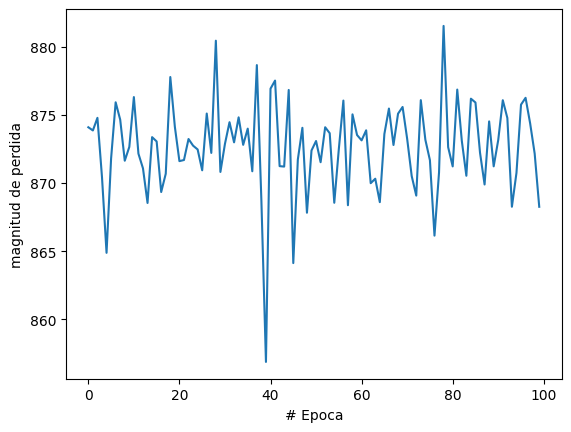

In [59]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("magnitud de perdida")
plt.plot(historial.history["loss"])

In [60]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [61]:
for i, prediction in enumerate(predictions):
    print(f"Predicción {i+1}: {prediction[0]}")

Predicción 1: 49.49703598022461
Predicción 2: 49.57695770263672
Predicción 3: 51.07552719116211
Predicción 4: 53.48322677612305
Predicción 5: 52.56410598754883
Predicción 6: 49.51701736450195
Predicción 7: 52.29436492919922
Predicción 8: 52.024620056152344
Predicción 9: 53.503211975097656
Predicción 10: 51.03556823730469
Predicción 11: 52.27438735961914
Predicción 12: 50.745845794677734
Predicción 13: 50.79579544067383
Predicción 14: 51.3152961730957
Predicción 15: 52.85383224487305
Predicción 16: 52.843841552734375
Predicción 17: 51.35525894165039
Predicción 18: 52.224430084228516
Predicción 19: 52.63404083251953
Predicción 20: 51.41520309448242
Predicción 21: 51.3152961730957
Predicción 22: 52.24441146850586
Predicción 23: 49.856693267822266
Predicción 24: 52.91377639770508
Predicción 25: 52.93375015258789
Predicción 26: 49.527008056640625
Predicción 27: 49.50702667236328
Predicción 28: 51.99465560913086
Predicción 29: 50.46611022949219
Predicción 30: 50.16639709472656
Predicción 31: